# <font color='#9531A9'> COMPAS Project Models and Analysis </font>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

### <font color='#9531A9'> Import dataset</font>

The dataset has already been cleaned and prepared

In [2]:
compas = pd.read_csv("data/compas_decile_dummies.csv")

In [3]:
compas.head()

,juv_fel_count,juv_misd_count,priors_count,is_recid,is_violent_recid,sex_Female,sex_Male,age_cat_25 - 45,age_cat_Greater than 45,age_cat_Less than 25,...,c_charge_degree_(F5),c_charge_degree_(F6),c_charge_degree_(F7),c_charge_degree_(M1),c_charge_degree_(M2),c_charge_degree_(MO3),c_charge_degree_(NI0),c_charge_degree_(TCX),c_charge_degree_(X),decile_score
0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,-1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,5
3,0,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,4,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,4


# <font color='#9531A9'> Evaluate Different Models </font>



In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

Split the independent variables and the target variable into X and y respectively

In [5]:
X = compas.drop('decile_score', axis=1)
y = compas['decile_score']

Use X and y to generate training and test data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=42
                                                   )

Create a function that will evaluate different models and record their performance in a dataframe

In [7]:
def evaluate_model(estimator):
    cv_results = cross_validate(estimator, # what kind of algorithm to use - going to perform cross validation
                    X=X,                   # X = independant variables
                    y=y,                   # y = target variable (aka answer)
                    scoring="neg_mean_absolute_error",  # the error metric to use
                          n_jobs=-1, cv=3,
                     return_train_score=True)
    return pd.DataFrame(cv_results).abs().mean().to_dict()

In [8]:
RESULTS = {}

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression


RESULTS["tree"] = evaluate_model(DecisionTreeRegressor())
RESULTS["linear"] = evaluate_model(LinearRegression())

pd.DataFrame.from_dict(RESULTS).T

,fit_time,score_time,test_score,train_score
tree,0.059918,0.002908,1.989655,1.285187
linear,0.040442,0.003591,19793.212984,1.835857


In [10]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge

RESULTS["elasticnet"] = evaluate_model(ElasticNet()) 
RESULTS["lasso"] = evaluate_model(Lasso()) 
RESULTS["ridge"] = evaluate_model(Ridge())

pd.DataFrame.from_dict(RESULTS).T

,fit_time,score_time,test_score,train_score
tree,0.059918,0.002908,1.989655,1.285187
linear,0.040442,0.003591,19793.212984,1.835857
elasticnet,0.013554,0.003307,2.269257,2.261963
lasso,0.011351,0.003452,2.279531,2.271697
ridge,0.019102,0.002914,1.845721,1.836082


In [11]:
from mlxtend.regressor import StackingRegressor

estimator_stacking = StackingRegressor(
    regressors=[
        DecisionTreeRegressor(),
        LinearRegression(),
        ElasticNet()
    ], 
    meta_regressor=ElasticNet())


RESULTS["stacking"]  = evaluate_model(estimator_stacking)

pd.DataFrame.from_dict(RESULTS).T

,fit_time,score_time,test_score,train_score
tree,0.059918,0.002908,1.989655,1.285187
linear,0.040442,0.003591,19793.212984,1.835857
elasticnet,0.013554,0.003307,2.269257,2.261963
lasso,0.011351,0.003452,2.279531,2.271697
ridge,0.019102,0.002914,1.845721,1.836082
stacking,0.048864,0.006339,1083.864131,1.453456


In [12]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

estimator_randomforest = RandomForestRegressor(n_estimators=100)

RESULTS["randomforest_100"] = evaluate_model(estimator_randomforest)

pd.DataFrame.from_dict(RESULTS).T

,fit_time,score_time,test_score,train_score
tree,0.059918,0.002908,1.989655,1.285187
linear,0.040442,0.003591,19793.212984,1.835857
elasticnet,0.013554,0.003307,2.269257,2.261963
lasso,0.011351,0.003452,2.279531,2.271697
ridge,0.019102,0.002914,1.845721,1.836082
stacking,0.048864,0.006339,1083.864131,1.453456
randomforest_100,1.229187,0.061315,1.899234,1.351370


In [13]:
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier

estimator_adaboost = AdaBoostRegressor(n_estimators=100)

RESULTS["adaboost_100"]  = evaluate_model(estimator_adaboost)

pd.DataFrame.from_dict(RESULTS).T

,fit_time,score_time,test_score,train_score
tree,0.059918,0.002908,1.989655,1.285187
linear,0.040442,0.003591,19793.212984,1.835857
elasticnet,0.013554,0.003307,2.269257,2.261963
lasso,0.011351,0.003452,2.279531,2.271697
ridge,0.019102,0.002914,1.845721,1.836082
stacking,0.048864,0.006339,1083.864131,1.453456
randomforest_100,1.229187,0.061315,1.899234,1.351370
adaboost_100,0.236153,0.013292,2.052854,2.036439


In [14]:
evaluate_model(LinearRegression())

{'fit_time': 0.018834829330444336,
 'score_time': 0.005149682362874349,
 'test_score': 19793.21298422925,
 'train_score': 1.8358574582337859}

# <font color='#9531A9'> Linear Regression </font>


Further exploration of the linear regression model that performed well in the test above

In [15]:
my_model = LinearRegression()

In [16]:
my_model.fit(X=X_train, y=y_train)

LinearRegression()

In [17]:
predictions = my_model.predict(X_test)

In [18]:
check = X_test.reset_index().copy() # make a copy of indices and data
check["target"] = y_test.tolist()
check["prediction"] = predictions
check

,index,juv_fel_count,juv_misd_count,priors_count,is_recid,is_violent_recid,sex_Female,sex_Male,age_cat_25 - 45,age_cat_Greater than 45,...,c_charge_degree_(F6),c_charge_degree_(F7),c_charge_degree_(M1),c_charge_degree_(M2),c_charge_degree_(MO3),c_charge_degree_(NI0),c_charge_degree_(TCX),c_charge_degree_(X),target,prediction
0,12267,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,3,6.115809
1,1011,0,0,5,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,10,3.617612
2,8753,2,0,4,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,10,7.474329
3,3668,0,0,15,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,4,5.973399
4,12096,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,7,5.692064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3098,6436,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,4,5.322882
3099,8072,0,0,0,-1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,3,4.551811
3100,5312,0,0,2,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,3,4.001410
3101,7729,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,5,4.729256


### <font color='#9531A9'> Evaluate the linear regression model </font>

In [19]:
from sklearn import metrics

In [20]:
mae = metrics.mean_absolute_error(y_test, predictions)
print(f"the Mean Absolute Error is {mae}")

the Mean Absolute Error is 1.8007405937495746


In [21]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print(f"the Root Mean Squared Error is {rmse}")

the Root Mean Squared Error is 2.2127568624304965


In [22]:
model_r2 = metrics.r2_score(y_test, predictions)
model_r2

0.43397161989892397

Perform Cross Validation

In [38]:
from sklearn.model_selection import cross_validate

scoring_functions = {"mae": "neg_mean_absolute_error", "rmse": "neg_root_mean_squared_error"}

scores = cross_validate(
    my_model,                # estimator
    X,
    y,
    scoring=scoring_functions, # a single scorer or a dict with multiple scoring functions
    cv=5,                      # number of partitions
    return_train_score=True    # return the training error, not only the test error
)

In [39]:
results_df = pd.DataFrame(scores)

In [40]:
results_df

,fit_time,score_time,test_mae,train_mae,test_rmse,train_rmse
0,0.010214,0.003209,-1.912272,-1.818283,-2.344273,-2.231650
1,0.007866,0.002983,-1.836492,-1.837294,-2.253617,-2.254121
2,0.010562,0.002783,-1.873952,-1.829874,-2.282153,-2.247714
3,0.009749,0.002136,-1.795089,-1.851480,-2.191285,-2.269720
4,0.007561,0.002338,-852.990283,-1.846393,-47406.800287,-2.256712


### <font color='#9531A9'> Get the importance of each feature for the model </font>

In [41]:
importance = my_model.coef_

In [42]:
# summarize feature importance
for i,v in enumerate(importance):
     print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.35397
Feature: 1, Score: 0.18998
Feature: 2, Score: 0.23101
Feature: 3, Score: 0.54807
Feature: 4, Score: 0.37083
Feature: 5, Score: 0.03350
Feature: 6, Score: -0.03350
Feature: 7, Score: -0.03791
Feature: 8, Score: -1.59580
Feature: 9, Score: 1.63371
Feature: 10, Score: 0.77025
Feature: 11, Score: -0.44606
Feature: 12, Score: 0.07192
Feature: 13, Score: -0.34282
Feature: 14, Score: 0.87554
Feature: 15, Score: -0.92883
Feature: 16, Score: 0.28392
Feature: 17, Score: -0.46968
Feature: 18, Score: -0.96409
Feature: 19, Score: -0.91429
Feature: 20, Score: -0.86216
Feature: 21, Score: -2.05123
Feature: 22, Score: -1.29958
Feature: 23, Score: -1.35847
Feature: 24, Score: -1.51483
Feature: 25, Score: -1.13675
Feature: 26, Score: 0.04278
Feature: 27, Score: -0.53219
Feature: 28, Score: -1.59291
Feature: 29, Score: -0.91953


In [43]:
X_test.columns

Index(['juv_fel_count', 'juv_misd_count', 'priors_count', 'is_recid',
       'is_violent_recid', 'sex_Female', 'sex_Male', 'age_cat_25 - 45',
       'age_cat_Greater than 45', 'age_cat_Less than 25',
       'race_African-American', 'race_Asian', 'race_Caucasian',
       'race_Hispanic', 'race_Native American', 'race_Other',
       'c_charge_degree_(CO3)', 'c_charge_degree_(CT)', 'c_charge_degree_(F1)',
       'c_charge_degree_(F2)', 'c_charge_degree_(F3)', 'c_charge_degree_(F5)',
       'c_charge_degree_(F6)', 'c_charge_degree_(F7)', 'c_charge_degree_(M1)',
       'c_charge_degree_(M2)', 'c_charge_degree_(MO3)',
       'c_charge_degree_(NI0)', 'c_charge_degree_(TCX)',
       'c_charge_degree_(X)'],
      dtype='object')

Make a dictionary of all features with an importance above 0.2

In [44]:
importance_dict_clean = {"juvenile felony count": 0.35397, "priors": 0.23101, "is recid": 0.54807, 
                   "is violent recid": 0.37083, "< 25 years old": 1.63371, 
                   "African American": 0.77025, "Native American": 0.87554,
                   "Charge Degree = CO3": 0.28392}

<BarContainer object of 8 artists>

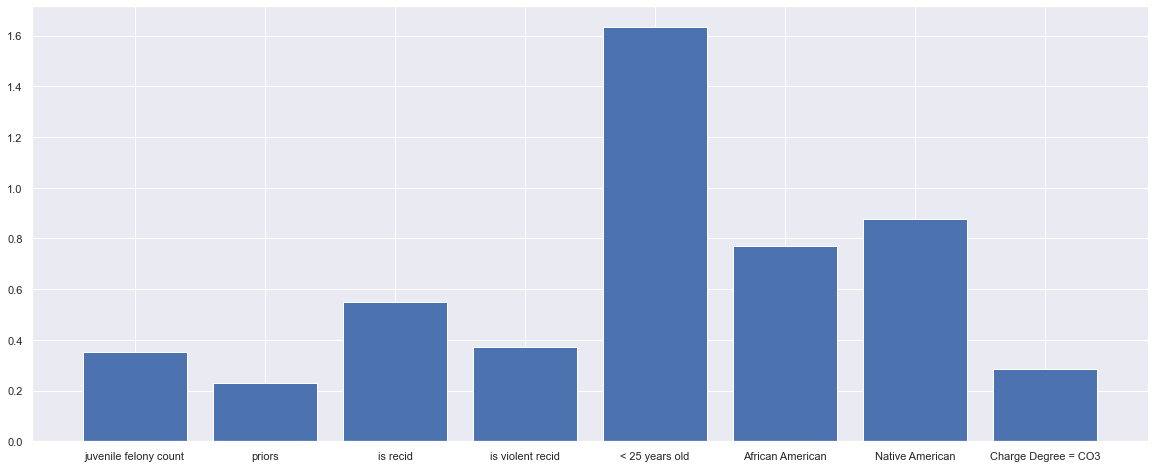

In [45]:
fig = plt.figure(1, [20, 8])

keys = importance_dict_clean.keys()
values = importance_dict_clean.values()

plt.bar(keys, values, width=0.8)

# <font color='#9531A9'> KNN </font>


In [60]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [61]:
knn_classifier = KNeighborsClassifier(n_neighbors=10, 
                                        weights="uniform")

knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [62]:
predictions_KNN = knn_classifier.predict(X_test)

In [63]:
check_KNN = X_test.reset_index().copy() # make a copy of indices and data
check_KNN["target"] = y_test.tolist()
check_KNN["prediction"] = predictions_KNN
check_KNN

,index,juv_fel_count,juv_misd_count,priors_count,is_recid,is_violent_recid,sex_Female,sex_Male,age_cat_25 - 45,age_cat_Greater than 45,...,c_charge_degree_(F6),c_charge_degree_(F7),c_charge_degree_(M1),c_charge_degree_(M2),c_charge_degree_(MO3),c_charge_degree_(NI0),c_charge_degree_(TCX),c_charge_degree_(X),target,prediction
0,12267,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,3,9
1,1011,0,0,5,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,10,8
2,8753,2,0,4,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,10,10
3,3668,0,0,15,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,4,6
4,12096,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3098,6436,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,4,3
3099,8072,0,0,0,-1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,3,1
3100,5312,0,0,2,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,3,3
3101,7729,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,5,3


In [64]:
f1_score(y_test, predictions_KNN, average="macro")

0.26156553371957414

# <font color='#9531A9'> Decision Tree </font>

In [65]:
tree = DecisionTreeClassifier()

In [66]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [71]:
simple_tree_score = cross_val_score(tree, X, y, cv=3).mean()

simple_tree_score

0.23070972732546893

In [68]:
predictions_tree = tree.predict(X_test)

In [69]:
check_tree = X_test.reset_index().copy() # make a copy of indices and data
check_tree["target"] = y_test.tolist()
check_tree["prediction"] = predictions_tree
check_tree

,index,juv_fel_count,juv_misd_count,priors_count,is_recid,is_violent_recid,sex_Female,sex_Male,age_cat_25 - 45,age_cat_Greater than 45,...,c_charge_degree_(F6),c_charge_degree_(F7),c_charge_degree_(M1),c_charge_degree_(M2),c_charge_degree_(MO3),c_charge_degree_(NI0),c_charge_degree_(TCX),c_charge_degree_(X),target,prediction
0,12267,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,3,9
1,1011,0,0,5,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,10,8
2,8753,2,0,4,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,10,10
3,3668,0,0,15,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,4,6
4,12096,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3098,6436,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,4,3
3099,8072,0,0,0,-1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,3,3
3100,5312,0,0,2,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,3,3
3101,7729,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,5,3


In [70]:
f1_score(y_test, predictions_tree, average="macro")

0.33579568653980507

# <font color='#9531A9'> Random Forrest </font>

In [46]:
estimator_randomforest = RandomForestRegressor(n_estimators=100)

In [47]:
estimator_randomforest.fit(X_train, y_train)

RandomForestRegressor()

In [49]:
predictions_rf = estimator_randomforest.predict(X_test)

In [50]:
check_rf = X_test.reset_index().copy() # make a copy of indices and data
check_rf["target"] = y_test.tolist()
check_rf["prediction"] = predictions_rf
check_rf

,index,juv_fel_count,juv_misd_count,priors_count,is_recid,is_violent_recid,sex_Female,sex_Male,age_cat_25 - 45,age_cat_Greater than 45,...,c_charge_degree_(F6),c_charge_degree_(F7),c_charge_degree_(M1),c_charge_degree_(M2),c_charge_degree_(MO3),c_charge_degree_(NI0),c_charge_degree_(TCX),c_charge_degree_(X),target,prediction
0,12267,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,3,6.468639
1,1011,0,0,5,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,10,5.167483
2,8753,2,0,4,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,10,9.944583
3,3668,0,0,15,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,4,5.474500
4,12096,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,7,5.408326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3098,6436,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,4,4.129119
3099,8072,0,0,0,-1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,3,4.343938
3100,5312,0,0,2,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,3,3.063747
3101,7729,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,5,5.458628


In [51]:
importance_rf = estimator_randomforest.feature_importances_

In [52]:
for i,v in enumerate(importance_rf):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.02698
Feature: 1, Score: 0.02034
Feature: 2, Score: 0.39980
Feature: 3, Score: 0.03833
Feature: 4, Score: 0.01996
Feature: 5, Score: 0.01633
Feature: 6, Score: 0.01580
Feature: 7, Score: 0.02779
Feature: 8, Score: 0.05875
Feature: 9, Score: 0.19316
Feature: 10, Score: 0.04304
Feature: 11, Score: 0.00131
Feature: 12, Score: 0.01746
Feature: 13, Score: 0.00923
Feature: 14, Score: 0.00166
Feature: 15, Score: 0.00970
Feature: 16, Score: 0.00002
Feature: 17, Score: 0.00001
Feature: 18, Score: 0.00874
Feature: 19, Score: 0.01699
Feature: 20, Score: 0.02146
Feature: 21, Score: 0.00028
Feature: 22, Score: 0.00025
Feature: 23, Score: 0.00543
Feature: 24, Score: 0.02420
Feature: 25, Score: 0.01544
Feature: 26, Score: 0.00660
Feature: 27, Score: 0.00095
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000


In [58]:
importance_dictrf_clean = {"priors": 0.39980, "< 25 years old": 0.19316, "> 45 years old": 0.05875,
                   "African American": 0.04304, "is_recid": 0.03833}

<BarContainer object of 5 artists>

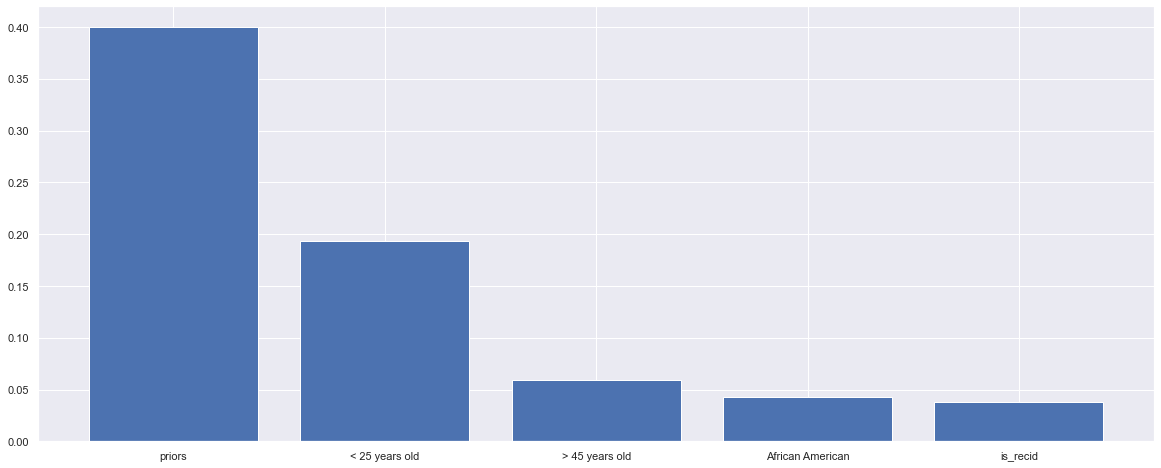

In [59]:
fig = plt.figure(1, [20, 8])

keys = importance_dictrf_clean.keys()
values = importance_dictrf_clean.values()

plt.bar(keys, values, width=0.8)